# Introduction

## About Dataset

### Context
Lists estimates of the percentage of body fat determined by underwater
weighing and various body circumference measurements for 252 men.

### Educational use of the dataset
This data set can be used to illustrate multiple regression techniques. Accurate measurement of body fat is inconvenient/costly and it is desirable to have easy methods of estimating body fat that are not inconvenient/costly.

### Content
The variables listed below, from left to right, are:

    Density determined from underwater weighing
    Percent body fat from Siri's (1956) equation
    Age (years)
    Weight (lbs)
    Height (inches)
    Neck circumference (cm)
    Chest circumference (cm)
    Abdomen 2 circumference (cm)
    Hip circumference (cm)
    Thigh circumference (cm)
    Knee circumference (cm)
    Ankle circumference (cm)
    Biceps (extended) circumference (cm)
    Forearm circumference (cm)
    Wrist circumference (cm)

(Measurement standards are apparently those listed in Benhke and Wilmore (1974), pp. 45-48 where, for instance, the abdomen 2 circumference is measured "laterally, at the level of the iliac crests, and anteriorly, at the umbilicus".)

These data are used to produce the predictive equations for lean body weight given in the abstract "Generalized body composition prediction equation for men using simple measurement techniques", K.W. Penrose, A.G. Nelson, A.G. Fisher, FACSM, Human Performance Research Center, Brigham Young University, Provo, Utah 84602 as listed in Medicine and Science in Sports and Exercise, vol. 17, no. 2, April 1985, p. 189. (The predictive equation were obtained from the first 143 of the 252 cases that are listed below).

### More details
A variety of popular health books suggest that the readers assess their health, at least in part, by estimating their percentage of body fat. In Bailey (1994), for instance, the reader can estimate body fat from tables using their age and various skin-fold measurements obtained by using a caliper. Other texts give predictive equations for body fat using body circumference measurements (e.g. abdominal circumference) and/or skin-fold measurements. See, for instance, Behnke and Wilmore (1974), pp. 66-67; Wilmore (1976), p. 247; or Katch and McArdle (1977), pp. 120-132).

The percentage of body fat for an individual can be estimated once body density has been determined. Folks (e.g. Siri (1956)) assume that the body consists
of two components - lean body tissue and fat tissue. Letting:

    D = Body Density (gm/cm^3)
    A = proportion of lean body tissue
    B = proportion of fat tissue (A+B=1)
    a = density of lean body tissue (gm/cm^3)
    b = density of fat tissue (gm/cm^3)

we have:

D = 1/[(A/a) + (B/b)]

solving for B we find:

B = (1/D)*[ab/(a-b)] - [b/(a-b)].

Using the estimates a=1.10 gm/cm^3 and b=0.90 gm/cm^3 (see Katch and McArdle (1977), p. 111 or Wilmore (1976), p. 123) we come up with "Siri's equation":

Percentage of Body Fat (i.e. 100*B) = 495/D - 450.

Volume, and hence body density, can be accurately measured a variety of ways. The technique of underwater weighing "computes body volume as the difference between body weight measured in air and weight measured during water submersion. In other words, body volume is equal to the loss of weight in
water with the appropriate temperature correction for the water's density" (Katch and McArdle (1977), p. 113). Using this technique,

Body Density = WA/[(WA-WW)/c.f. - LV]

where:

    WA = Weight in air (kg)
    WW = Weight in water (kg)
    c.f. = Water correction factor (=1 at 39.2 deg F as one-gram of water occupies exactly one cm^3 at this temperature, =.997 at 76-78 deg F)
    LV = Residual Lung Volume (liters)

(Katch and McArdle (1977), p. 115). Other methods of determining body volume are given in Behnke and Wilmore (1974), p. 22 ff.

### Source
The data were generously supplied by Dr. A. Garth Fisher who gave permission to freely distribute the data and use for non-commercial purposes.

Roger W. Johnson
Department of Mathematics & Computer Science
South Dakota School of Mines & Technology
501 East St. Joseph Street
Rapid City, SD 57701

email address: rwjohnso@silver.sdsmt.edu
web address: http://silver.sdsmt.edu/~rwjohnso

### References
Bailey, Covert (1994). Smart Exercise: Burning Fat, Getting Fit, Houghton-Mifflin Co., Boston, pp. 179-186.

Behnke, A.R. and Wilmore, J.H. (1974). Evaluation and Regulation of Body Build and Composition, Prentice-Hall, Englewood Cliffs, N.J.

Siri, W.E. (1956), "Gross composition of the body", in Advances in Biological and Medical Physics, vol. IV, edited by J.H. Lawrence and C.A. Tobias, Academic Press, Inc., New York.

Katch, Frank and McArdle, William (1977). Nutrition, Weight Control, and Exercise, Houghton Mifflin Co., Boston.

Wilmore, Jack (1976). Athletic Training and Physical Fitness: Physiological Principles of the Conditioning Process, Allyn and Bacon, Inc., Boston.

### Usability
10.00

### License
Data files © Original Authors

### Expected update frequency
Never

### Tags
Earth and Nature
Health
Health Conditions
Public Health
Healthcare
Regression

The analysis will be based mostly on the BodyFat Prediction from Harshit Gupta on Kaggle.

In [3]:
## Import Necessary libraries

## Preprocessing libraries
import pandas as pd
import numpy as np

## Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

## Identify outliers with Z-Score Method
import scipy.stats as stats

## Train-test sklearn library
from sklearn.model_selection import train_test_split

## Preprocess the data to normalize it
from sklearn.preprocessing import PowerTransformer

## Machine Learning Model library
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression , ElasticNet , Lasso , Ridge
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge

## Evaluation metrics library
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

## Save the model
import joblib

In [4]:
## Import Dataset

df = pd.read_csv('../body_fat/bodyfat.csv')
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [5]:
## exploring the shape of the data (shape[0] is the rows; shape[1] is the)
print("The shape of the dataframe is", df.shape)

The shape of the dataframe is (252, 15)


In [6]:
#Some info about our attributes and its datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [7]:
#Convert to metric units:
df['Height'] = (df['Height'] * 0.0254).round(2) # converting to m

df['Weight'] = (df['Weight'] * 0.454).round(2) # converting to kg
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,70.03,1.72,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,78.66,1.84,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,69.92,1.68,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,83.88,1.84,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,83.65,1.81,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [8]:
#Some analysis on the numerical columns
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,81.231627,1.782262,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,13.342709,0.093238,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,53.800000,0.750000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,72.187500,1.730000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,80.130000,1.780000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,89.440000,1.840000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,164.870000,1.970000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [9]:
#Check for null values
df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [10]:
#Check for duplicates in the dataset
df.duplicated().sum()

np.int64(0)

Let's remove the possible outliers or mistakes.

It is very unlikely that someone is under 3 percent body-fat, these are called essential fat and are necessary to maintain a functionning body.

The minimal height is 75 cm, which is definitely not possible considering that the minimal age in the dataset is 22 years and we would delete this record as well.

In [11]:
print(df[df['BodyFat'] < 3]) # people with extremly low body-fat (under essential fat threshold)
print(df[df['Height'] < 1]) # men lower than 1 m

     Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen   Hip  Thigh  \
171   1.0983      0.7   35   57.09    1.66  34.0   90.8     75.0  89.2   50.0   
181   1.1089      0.0   40   53.80    1.73  33.8   79.3     69.4  85.0   47.2   

     Knee  Ankle  Biceps  Forearm  Wrist  
171  34.8   22.0    24.8     25.9   16.9  
181  33.5   20.2    27.7     24.6   16.5  
    Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
41    1.025     32.9   44   93.07    0.75  36.6  106.0    104.3  115.5   70.6   

    Knee  Ankle  Biceps  Forearm  Wrist  
41  42.5   23.7    33.6     28.7   17.4  


In [12]:
df.drop([41, 171, 181], axis=0, inplace=True)
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,1.055311,19.246586,44.947791,81.391205,1.787108,38.030522,100.930120,92.672289,99.944980,59.447791,38.610442,23.116064,32.316466,28.691165,18.245382
std,0.018545,8.201219,12.658403,13.198728,0.066385,2.415865,8.339071,10.663334,7.043041,5.141098,2.379646,1.693198,2.986639,2.008591,0.927312
min,0.995000,3.000000,22.000000,56.750000,1.630000,31.100000,83.400000,70.400000,85.300000,49.300000,33.000000,19.100000,25.300000,21.000000,15.800000
25%,1.041400,12.500000,36.000000,72.300000,1.740000,36.400000,94.600000,85.200000,95.600000,56.100000,37.100000,22.000000,30.300000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,80.240000,1.780000,38.000000,99.700000,91.000000,99.300000,59.000000,38.500000,22.800000,32.100000,28.800000,18.300000
75%,1.070300,25.300000,54.000000,89.440000,1.840000,39.500000,105.300000,99.200000,103.500000,62.300000,39.900000,24.000000,34.400000,30.000000,18.800000
max,1.099100,47.500000,81.000000,164.870000,1.970000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


# 1. Data analysis

In this section, we will use various visualization tools to explore the dataset.

It is important to do initial data exploration as
- Data might be biased (biased data will affect the accuracy of the model)
- Data might be noisy (especially high dimension data)
- It shows us the relationship between different features and target and we can better train our ML model

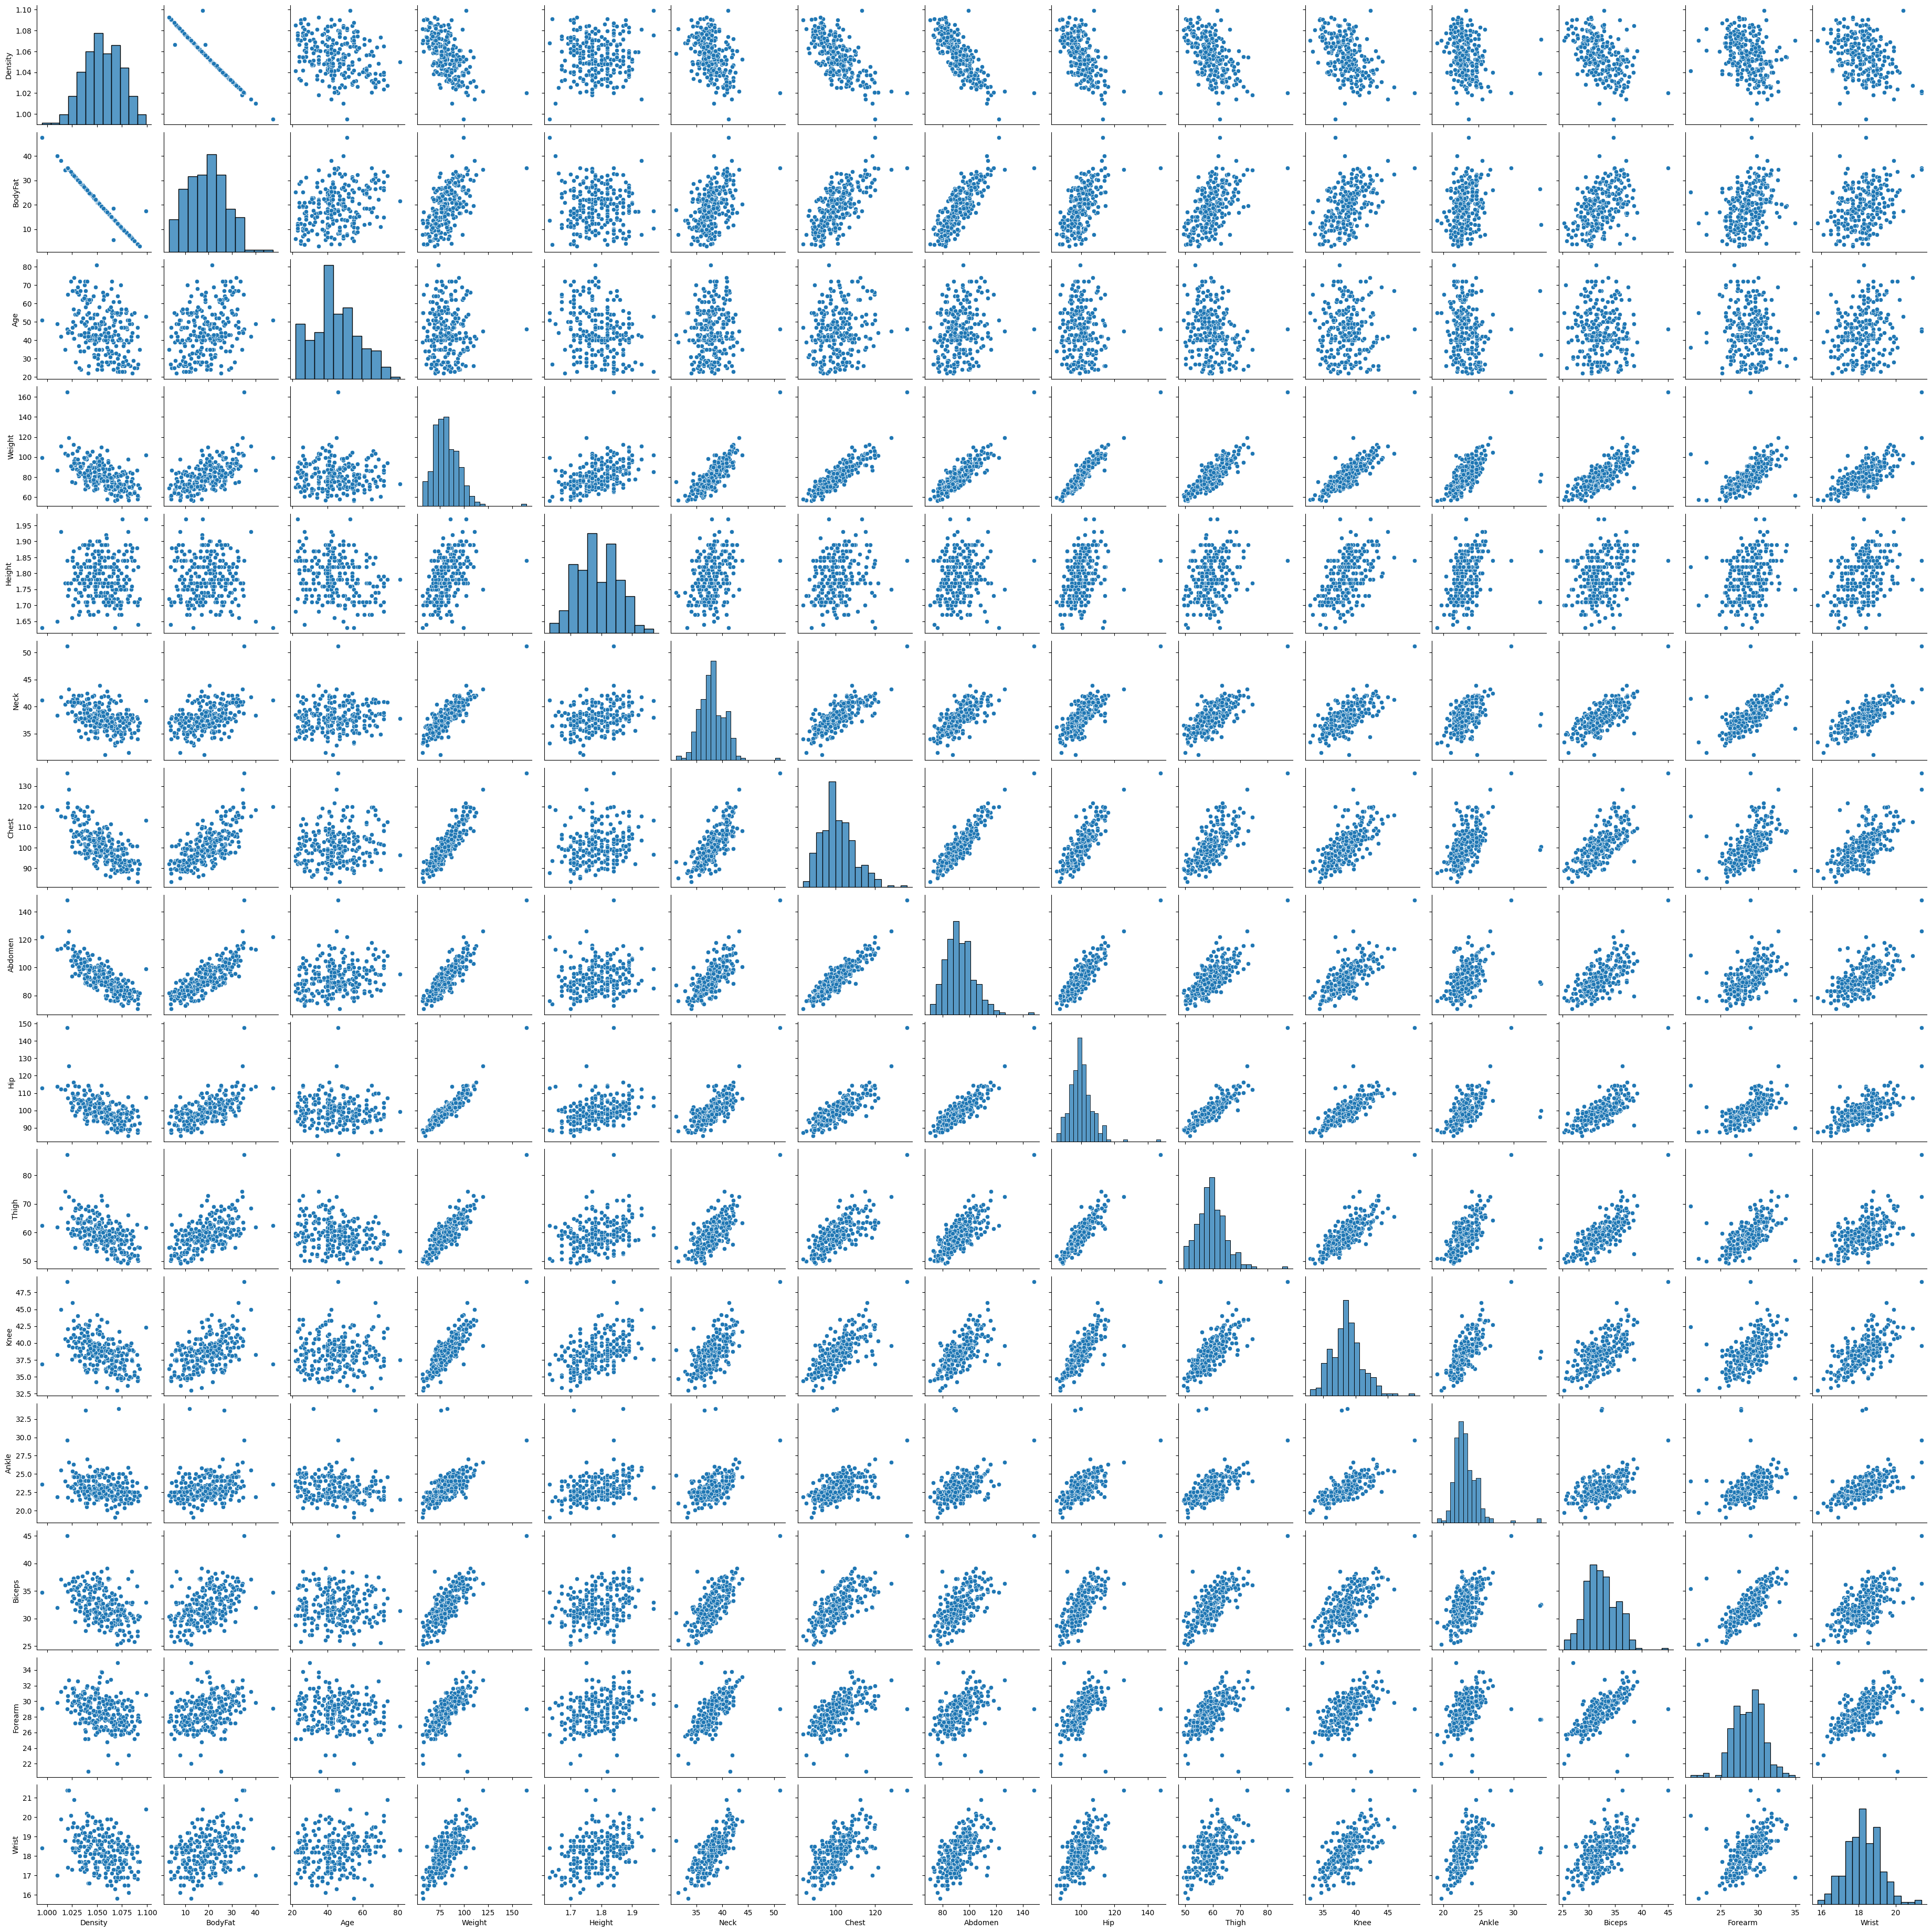

In [13]:
# Plot feature distributions
sns.pairplot(df)
plt.show()

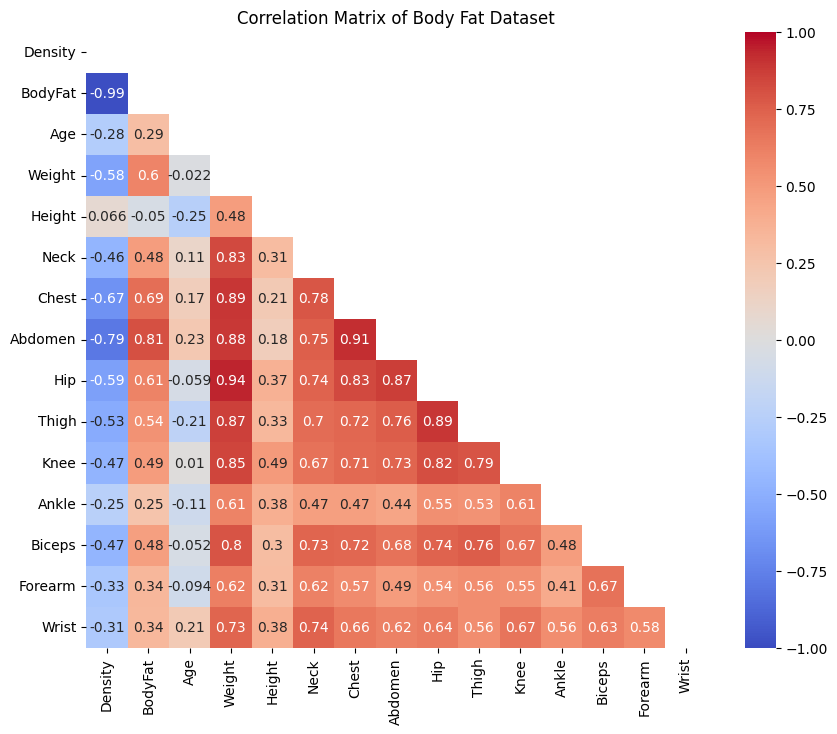

In [14]:
# Compute correlation matrix
corr_matrix = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Body Fat Dataset')
plt.show()

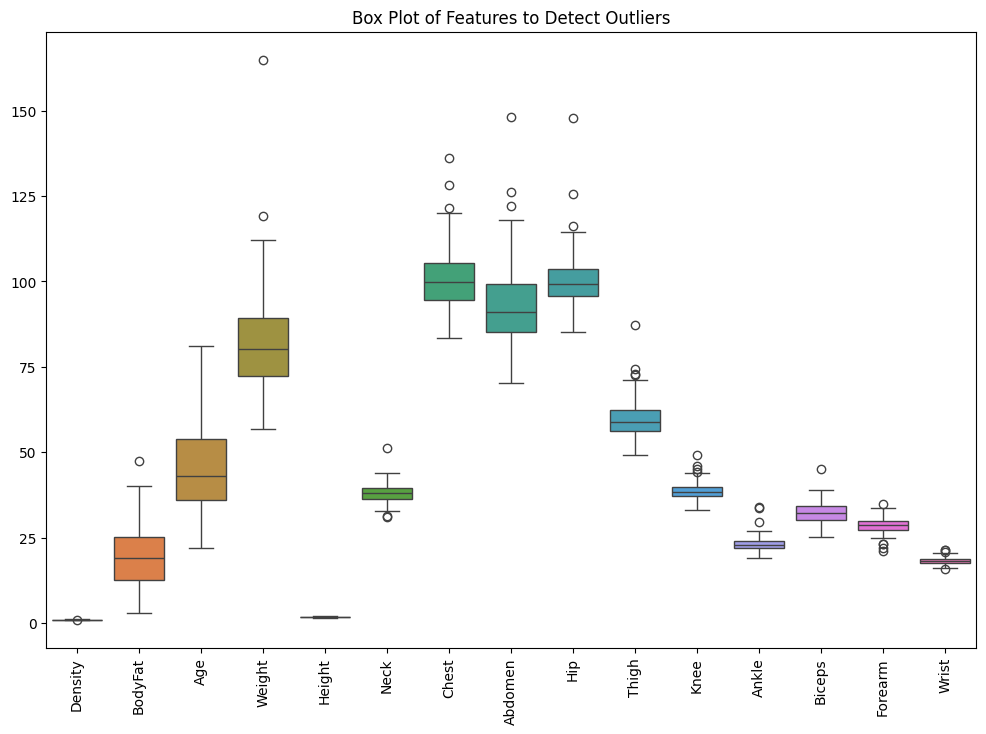

In [15]:
# Plot box plots to detect outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Box Plot of Features to Detect Outliers')
plt.xticks(rotation=90)
plt.show()

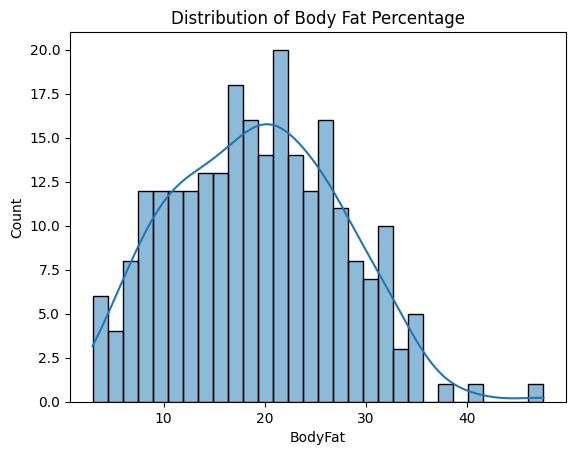

In [16]:
# Visualize Target Feature (Body Fat) Distribution
sns.histplot(df['BodyFat'], kde=True, bins=30)
plt.title('Distribution of Body Fat Percentage')
plt.show()

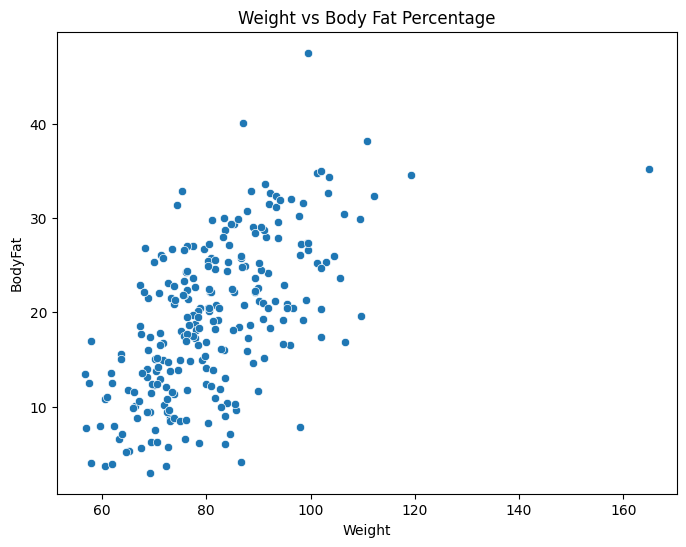

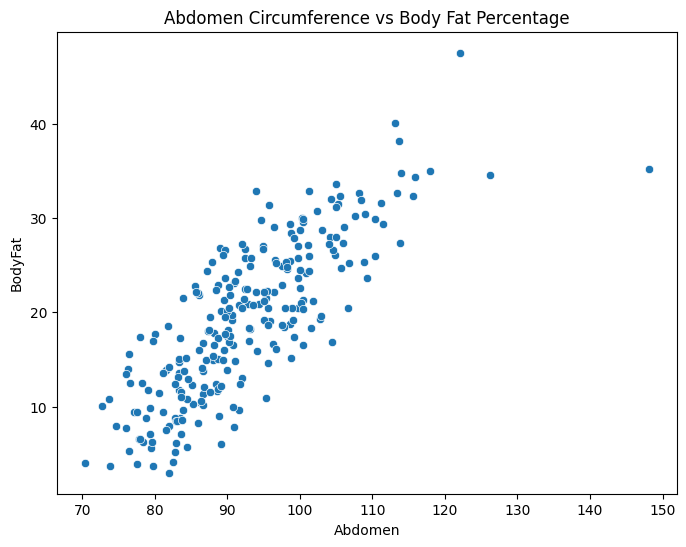

In [17]:
# Scatter plot of Weight vs BodyFat
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Weight', y='BodyFat', data=df)
plt.title('Weight vs Body Fat Percentage')
plt.show()

# Scatter plot of Abdomen Circumference vs BodyFat
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Abdomen', y='BodyFat', data=df)
plt.title('Abdomen Circumference vs Body Fat Percentage')
plt.show()

The dataset has some outliers.
Some columns such as - Height,Ankle,Age etc are skewed

In [18]:
print(f'-------Column Skewness------\n{df.skew(axis=0).sort_values()}')

-------Column Skewness------
Forearm   -0.222857
Density   -0.107332
Height     0.076959
BodyFat    0.200967
Age        0.270312
Wrist      0.281208
Biceps     0.333512
Knee       0.557358
Neck       0.562085
Chest      0.750377
Thigh      0.897869
Abdomen    0.898893
Weight     1.282194
Hip        1.586245
Ankle      2.286475
dtype: float64


We see Ankle , Hip , and Weight are the most skewed columns.
To reduce the influence of multicollinearity and improve the model's accuracy, we will create new columns:
- BMI - Body Mass Index
- ACratio - Abdomen to Chest ratio
- HTratio - Hip to Thogh ratio

In [19]:
#Insert BMI columns to the dataset:

h_squared = df['Height'] ** 2

df['BMI'] = df['Weight'] / h_squared #creating bmi

#rounding the value to 1 decimal
df['BMI'] = round(df['BMI'], 1)
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
0,1.0708,12.3,23,70.03,1.72,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.7
1,1.0853,6.1,22,78.66,1.84,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.2
2,1.0414,25.3,22,69.92,1.68,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.8
3,1.0751,10.4,26,83.88,1.84,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.8
4,1.0340,28.7,24,83.65,1.81,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.5


In [20]:
df['ACratio'] = df['Abdomen']/df['Chest']
df['HTratio'] = df['Hip']/df['Thigh']
df.drop(['Weight','Height','Abdomen','Chest','Hip','Thigh'],axis=1,inplace=True)
df.head()

,Density,BodyFat,Age,Neck,Knee,Ankle,Biceps,Forearm,Wrist,BMI,ACratio,HTratio
0,1.0708,12.3,23,36.2,37.3,21.9,32.0,27.4,17.1,23.7,0.915145,1.601695
1,1.0853,6.1,22,38.5,37.3,23.4,30.5,28.9,18.2,23.2,0.886752,1.681431
2,1.0414,25.3,22,34.0,38.9,24.0,28.8,25.2,16.6,24.8,0.917537,1.664430
3,1.0751,10.4,26,37.4,37.3,22.8,32.4,29.4,18.2,24.8,0.848723,1.683860
4,1.0340,28.7,24,34.4,42.2,24.0,32.2,27.7,17.7,25.5,1.027749,1.612342


We will try to predict Body Density that is directly related with the measured data and later we will use the Siri's Equation to compute BodyFat.

In [21]:
X = df.drop(['BodyFat','Density'],axis=1)
y = df['Density']
X.head()

,Age,Neck,Knee,Ankle,Biceps,Forearm,Wrist,BMI,ACratio,HTratio
0,23,36.2,37.3,21.9,32.0,27.4,17.1,23.7,0.915145,1.601695
1,22,38.5,37.3,23.4,30.5,28.9,18.2,23.2,0.886752,1.681431
2,22,34.0,38.9,24.0,28.8,25.2,16.6,24.8,0.917537,1.664430
3,26,37.4,37.3,22.8,32.4,29.4,18.2,24.8,0.848723,1.683860
4,24,34.4,42.2,24.0,32.2,27.7,17.7,25.5,1.027749,1.612342


Let's identify and remove the outliers with the Z-Score Method (Standarization).
The Z-Score measures how many standard deviations a data point is from the mean. Typically, a Z-score of greater than 3 or less than -3 is considered an outlier.

Formula:
Z=(X−μ)/σ

Where:

    X is the data point,
    μ is the mean of the feature,
    σ is the standard deviation of the feature.

In [22]:
z = np.abs(stats.zscore(X))

#only keep rows in dataframe with all z-scores less than absolute value of 3 
X_clean = X[(z<3).all(axis=1)]
y_clean = y[(z<3).all(axis=1)]
#find how many rows are left in the dataframe 
X_clean.shape

(239, 10)

We will try to train different models, depending on the input data provided by the user:
- Model extra3 - takes all data as input
- Model extra2 - will be used when at least one of the following data is missing: Neck, Knee, Ankle, Biceps, Forearm, Wrist
- Model extra1 - will be used when at least one of the following data is missing: Hip, Thigh
- Model basic - will be used when at least one of the following data is missing: Chest, Abdomen.
The input of Height, Weight and Age will be obligatory to initiate the basic model.

For each model the following steps will be taken (Start with cleaned data (X_clean and y_clean)):
1. Drop certain data if needed, depending on the model
2. Train-test split
3. Apply Power Transformation
4. Save the Power Transformation for later use with the particular model
5. Test Machine Learning Models and check the metrics
6. Select the best and save it as the model to be deployed

# 2. Model extra3
This model takes all the input data.
## 2.1 Drop certain data if needed
Here, no data is going to be dropeed
## 2.2 Train-test split
We will use the default 25/75 split in train_test_split from scikit-learn.
We will set random_state=42: This sets a fixed random seed to ensure the split is reproducible. Using a specific random state ensures you always get the same split of training and testing data each time you run the code. You can set it to any number, but using 42 is a common convention.

In [23]:
X_extra3 = X_clean
y_extra3 = y_clean
X_extra3_train,X_extra3_test,y_extra3_train,y_extra3_test = train_test_split(X_extra3,y_extra3,random_state=42)

## 2.3 Applying Power Transformation to Normalize Data
### Why Apply a Power Transformation?

The power transformation is useful when your features are non-normally distributed or have skewness. Many machine learning algorithms (especially linear models) perform better when the features are normally distributed, as extreme outliers and skewed data can negatively affect their performance.

### PowerTransformer():

The PowerTransformer class from scikit-learn applies a power transformation, which is a way to stabilize variance and make the data more normal-like. This transformation can make the data less skewed and more symmetric, which is important for models like linear regression that assume normally distributed data.

By default, PowerTransformer uses the Yeo-Johnson transformation, which works with both positive and negative values. Essentially, the Yeo-Johnson Power Transformation inflates low variance data and deflates high variance data to create a more uniform dataset.

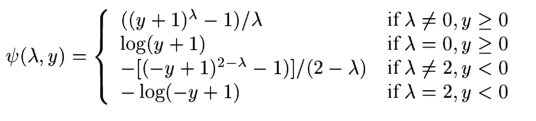

#### fit_transform():

trans.fit_transform(X_train): This applies the power transformation to the training data.

The fit_transform function does two things:
1. Fit: The transformer calculates the necessary transformation parameters (e.g., lambda value for Yeo-Johnson) based on the training data.
2. Transform: It then applies the transformation to the X_train data.

The reason we fit the transformation only on the training set is to avoid data leakage. If we fit on both the training and testing sets, the model might "see" the test data during training, which could lead to overly optimistic performance estimates.

#### transform():

trans.transform(X_test): After fitting the transformer on the training data, this line applies the same transformation to the testing data. The important part is that the transformation parameters (like the lambda for the power transformation) are not re-fitted on the test data; instead, the same parameters learned from the training data are used.

This ensures that the testing data is transformed in the same way as the training data, maintaining consistency when evaluating model performance.

In [24]:
trans_extra3 = PowerTransformer()
X_extra3_train_transformed = pd.DataFrame(trans_extra3.fit_transform(X_extra3_train), columns=X_extra3_train.columns)
X_extra3_test_transformed = pd.DataFrame(trans_extra3.transform(X_extra3_test), columns=X_extra3_test.columns)

## 2.4 Save the Power Transformation

In [24]:
# Save this transformer for use with `extra3`
joblib.dump(trans_extra3, 'trans_extra3.joblib')

['trans_extra3.joblib']

## 2.5. Test Machine Learning Models and check the metrics
We will use several Machine Learning Models and we will test them with the following metrics:
- MAE (Mean Absolute Error) to interpret the average error in predicting body density (which gives a more interpretable result).
- RMSE (Root Mean Squared Error) to emphasize larger errors more (especially if predicting extremely high or low body density is critical).
- R² score to understand how much of the variation in body fat the model can explain, which gives you a sense of the model’s overall performance.

In [25]:
# Models
kernel = KernelRidge()
random = RandomForestRegressor()
linear = LinearRegression()
elastic = ElasticNet()
lasso  = Lasso()
ridge = Ridge()
svr=SVR()
grad = GradientBoostingRegressor()
sgd = SGDRegressor()
bay = BayesianRidge()
clf = [linear,elastic,lasso,ridge,svr,grad,sgd,bay,random,kernel]

In [26]:
# Build models and their metrics
hashmap_extra3={}
def compute(model):
    model.fit(X_extra3_train_transformed,y_extra3_train)
    y_extra3_pred = model.predict(X_extra3_test_transformed)
    r2=r2_score(y_extra3_test,y_extra3_pred)
    rmse=root_mean_squared_error(y_extra3_test,y_extra3_pred)
    mae=mean_absolute_error(y_extra3_test,y_extra3_pred)
    hashmap_extra3[str(model)]=(r2,rmse,mae)

In [27]:
for i in clf:
    compute(i)

In [28]:
# Show the scores of models

score_extra3=pd.DataFrame(hashmap_extra3)
score_extra3 = score_extra3.transpose()
score_extra3.columns=['R2_score','RMSE','MAE']
score_extra3 = score_extra3.sort_values('R2_score',ascending=False)

In [29]:
score_extra3

,R2_score,RMSE,MAE
BayesianRidge(),0.657151,0.010957,0.009205
Ridge(),0.653765,0.011011,0.009215
LinearRegression(),0.652634,0.011029,0.009217
RandomForestRegressor(),0.604296,0.011771,0.009547
GradientBoostingRegressor(),0.550894,0.012541,0.010083
SGDRegressor(),0.220285,0.016524,0.012949
ElasticNet(),-0.006107,0.018770,0.016047
Lasso(),-0.006107,0.018770,0.016047
SVR(),-0.016909,0.018871,0.016073
KernelRidge(),-3181.532036,1.055678,1.055621


Bayesian Ridge, Ridge and Linear Regression perform best, but overall they perform reasonably well and there is some room for improvement.

Text(0.5, 1.0, 'Extra3 BayesianRidge: Actual Vs Predicted')

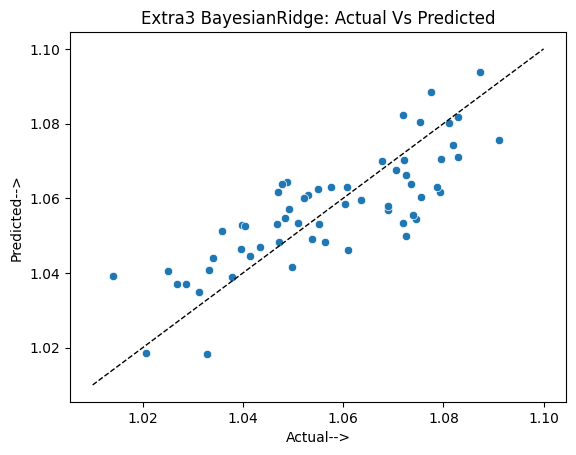

In [30]:
y_extra3_pred = bay.predict(X_extra3_test_transformed)
sns.scatterplot(x=y_extra3_test,y=y_extra3_pred)
plt.plot([1.01, 1.10], [1.01, 1.10], color = 'black',linestyle='--',linewidth=1)
plt.xlabel("Actual-->")
plt.ylabel("Predicted-->")
plt.title("Extra3 BayesianRidge: Actual Vs Predicted")

It seems that at low actual density values the model tends to overestimate them, while at high actual density values the model tends to underestimate them.
According to ChatGPT, it is a common issue called regression to the mean or bias.

Let's now calculate the body percentage and plot is as above, as it is easier to interpret.

Text(0.5, 1.0, 'Extra3 Body Fat Percentage BayesianRidge: Actual Vs Predicted')

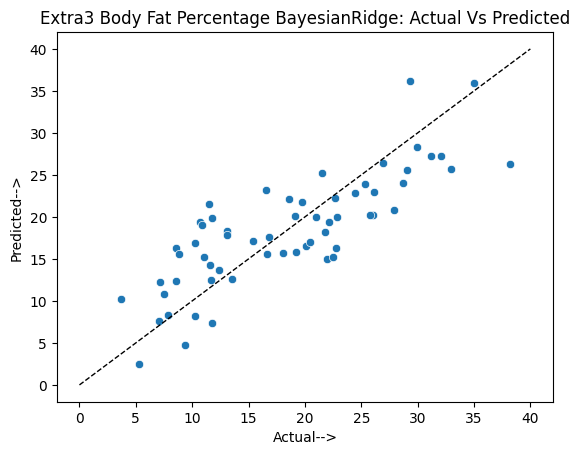

In [31]:
# Calculate bpdy fat percentage with Siri equation
perc_extra3_test = 495/y_extra3_test - 450
perc_extra3_pred = 495/y_extra3_pred - 450

# Plot as above
sns.scatterplot(x=perc_extra3_test,y=perc_extra3_pred)
plt.plot([0, 40], [0, 40], color = 'black',linestyle='--',linewidth=1)
plt.xlabel("Actual-->")
plt.ylabel("Predicted-->")
plt.title("Extra3 Body Fat Percentage BayesianRidge: Actual Vs Predicted")

In [32]:
# Calculate the metrics for body percentage
r2=r2_score(perc_extra3_test,perc_extra3_pred)
rmse=root_mean_squared_error(perc_extra3_test,perc_extra3_pred)
mae=mean_absolute_error(perc_extra3_test,perc_extra3_pred)

print("R2_score: ", r2)
print("RMSE: ", rmse)
print("MAE: ", mae)

R2_score:  0.6580496382086063
RMSE:  4.870860391479102
MAE:  4.084018686574706


## 2.6. Select and save the best model
Now we want to save the best model (Bayeasian Ridge) to be used for predicting the Body Density from the user input and calculating the Fat Percentage with Siri equation.

In [33]:
# Train the Bayeasian Ridge model again with separate name to avoid later confusion
bay_extra3 = BayesianRidge()
bay_extra3.fit(X_extra3_train_transformed,y_extra3_train)

# Confirm the metrics
y_extra3_pred = bay_extra3.predict(X_extra3_test_transformed)
r2=r2_score(y_extra3_test,y_extra3_pred)
rmse=root_mean_squared_error(y_extra3_test,y_extra3_pred)
mae=mean_absolute_error(y_extra3_test,y_extra3_pred)

print("R2_score: ", r2)
print("RMSE: ", rmse)
print("MAE: ", mae)

R2_score:  0.6571507890779844
RMSE:  0.01095712873065631
MAE:  0.009204968503066905


The scores are as above, we can save the model.

In [33]:
joblib.dump(bay_extra3, 'body_density_extra3.joblib')

['body_density_extra3.joblib']

# 3. Model extra2
The above model, which takes into account all input variables, will be used as model extra3, in cases where all the data is provided by the user.
For the cases where only limited data is provided we will try to train the models extra2, extra1 and basic. They will be deployed in case good results are obtained.
Model extra2 will **skip** the following variables:
- Neck circumference (cm)
- Knee circumference (cm)
- Ankle circumference (cm)
- Biceps (extended) circumference (cm)
- Forearm circumference (cm)
- Wrist circumference (cm)

We start from the cleaned data (X_clean and y_clean)

In [34]:
X_clean.head()

,Age,Neck,Knee,Ankle,Biceps,Forearm,Wrist,BMI,ACratio,HTratio
0,23,36.2,37.3,21.9,32.0,27.4,17.1,23.7,0.915145,1.601695
1,22,38.5,37.3,23.4,30.5,28.9,18.2,23.2,0.886752,1.681431
2,22,34.0,38.9,24.0,28.8,25.2,16.6,24.8,0.917537,1.664430
3,26,37.4,37.3,22.8,32.4,29.4,18.2,24.8,0.848723,1.683860
4,24,34.4,42.2,24.0,32.2,27.7,17.7,25.5,1.027749,1.612342


## 3.1. Drop data that will not be used

In [35]:
X_extra2 = X_clean.drop(['Neck','Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist'],axis=1)
y_extra2 = y_clean
X_extra2.head()

,Age,BMI,ACratio,HTratio
0,23,23.7,0.915145,1.601695
1,22,23.2,0.886752,1.681431
2,22,24.8,0.917537,1.664430
3,26,24.8,0.848723,1.683860
4,24,25.5,1.027749,1.612342


## 3.2. Train-test split is the same

In [36]:
X_extra2_train,X_extra2_test,y_extra2_train,y_extra2_test = train_test_split(X_extra2,y_extra2,random_state=42)

## 3.3. Apply Power Transformation

In [37]:
trans_extra2 = PowerTransformer()
X_extra2_train_transformed = pd.DataFrame(trans_extra2.fit_transform(X_extra2_train), columns=X_extra2_train.columns)
X_extra2_test_transformed = pd.DataFrame(trans_extra2.transform(X_extra2_test), columns=X_extra2_test.columns)

## 3.4. Save the power transformer

In [38]:
# Save this transformer for use with `extra2`
joblib.dump(trans_extra2, 'trans_extra2.joblib')

['trans_extra2.joblib']

## 3.5. Test Machine Learning Models and check the metrics

In [38]:
# Build models and their metrics
hashmap_extra2={}
def compute(model):
    model.fit(X_extra2_train_transformed,y_extra2_train)
    y_extra2_pred = model.predict(X_extra2_test_transformed)
    r2=r2_score(y_extra2_test,y_extra2_pred)
    rmse=root_mean_squared_error(y_extra2_test,y_extra2_pred)
    mae=mean_absolute_error(y_extra2_test,y_extra2_pred)
    hashmap_extra2[str(model)]=(r2,rmse,mae)

In [39]:
for i in clf:
    compute(i)

In [40]:
# Show the scores of models

score_extra2=pd.DataFrame(hashmap_extra2)
score_extra2 = score_extra2.transpose()
score_extra2.columns=['R2_score','RMSE','MAE']
score_extra2 = score_extra2.sort_values('R2_score',ascending=False)

In [41]:
score_extra2

,R2_score,RMSE,MAE
LinearRegression(),0.655563,0.010982,0.009066
Ridge(),0.655318,0.010986,0.009068
BayesianRidge(),0.654609,0.010998,0.009075
RandomForestRegressor(),0.601788,0.011809,0.009472
GradientBoostingRegressor(),0.545782,0.012612,0.010248
SGDRegressor(),0.233231,0.016386,0.013580
ElasticNet(),-0.006107,0.018770,0.016047
Lasso(),-0.006107,0.018770,0.016047
SVR(),-0.016909,0.018871,0.016073
KernelRidge(),-3183.151666,1.055947,1.055890


The best scores are only slightly worse than with the whole set of data. However, it is important to note that with reduced data (model2), the Linear Regression gives best scores. Actually, it gives slightly better score than with the whole data set.

Text(0.5, 1.0, 'Linear Regression Extra2: Actual Vs Predicted')

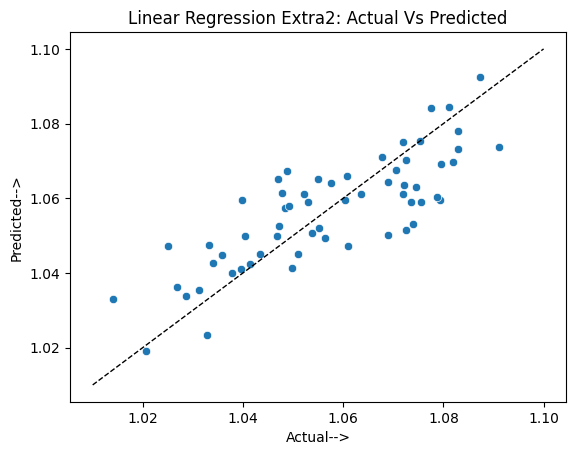

In [42]:
y_extra2_pred = linear.predict(X_extra2_test_transformed)
sns.scatterplot(x=y_extra2_test,y=y_extra2_pred)
plt.plot([1.01, 1.10], [1.01, 1.10], color = 'black',linestyle='--',linewidth=1)
plt.xlabel("Actual-->")
plt.ylabel("Predicted-->")
plt.title("Linear Regression Extra2: Actual Vs Predicted")

The bias that we observed in the full model seems smaller, but still observed.

Let's now calculate the body percentage and plot is as above, as it is easier to interpret.

Text(0.5, 1.0, 'Extra2 Body Fat Percentage Linear Regression: Actual Vs Predicted')

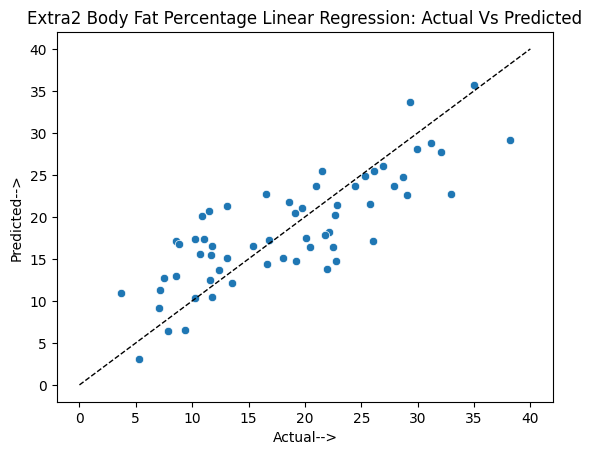

In [43]:
# Calculate bpdy fat percentage with Siri equation
perc_extra2_test = 495/y_extra2_test - 450
perc_extra2_pred = 495/y_extra2_pred - 450

# Plot as above
sns.scatterplot(x=perc_extra2_test,y=perc_extra2_pred)
plt.plot([0, 40], [0, 40], color = 'black',linestyle='--',linewidth=1)
plt.xlabel("Actual-->")
plt.ylabel("Predicted-->")
plt.title("Extra2 Body Fat Percentage Linear Regression: Actual Vs Predicted")

In [44]:
# Calculate the metrics for body percentage
r2=r2_score(perc_extra2_test,perc_extra2_pred)
rmse=root_mean_squared_error(perc_extra2_test,perc_extra2_pred)
mae=mean_absolute_error(perc_extra2_test,perc_extra2_pred)

print("R2_score: ", r2)
print("RMSE: ", rmse)
print("MAE: ", mae)

R2_score:  0.658052833575667
RMSE:  4.870837633463683
MAE:  4.01799676307655


## 3.6. Select and save the best model
Now we want to save the best model (Linear Regression) to be used for predicting the Body Density from the user input and calculating the Fat Percentage with Siri equation.

In [45]:
# Train the Linear Regression model again with separate name to avoid later confusion
linear_extra2 = LinearRegression()
linear_extra2.fit(X_extra2_train_transformed,y_extra2_train)

# Confirm the metrics
y_extra2_pred = linear_extra2.predict(X_extra2_test_transformed)
r2=r2_score(y_extra2_test,y_extra2_pred)
rmse=root_mean_squared_error(y_extra2_test,y_extra2_pred)
mae=mean_absolute_error(y_extra2_test,y_extra2_pred)

print("R2_score: ", r2)
print("RMSE: ", rmse)
print("MAE: ", mae)

R2_score:  0.6555628421767151
RMSE:  0.010982474039622887
MAE:  0.009065665165441461


The scores are as above, we can save the model.

In [45]:
# save the model2
joblib.dump(linear_extra2, 'body_density_extra2.joblib')

['body_density_extra2.joblib']

# 4. Model extra1
Now let's see if we can also build the more limited model.
Model extra1 will **skip**, compared to model extra2, the following variables:
- HTratio, which is the ratio of Hip to Tigh.

We start from the model extra2 data: X_extra2 and y_extra2.

In [46]:
X_extra2.head()

,Age,BMI,ACratio,HTratio
0,23,23.7,0.915145,1.601695
1,22,23.2,0.886752,1.681431
2,22,24.8,0.917537,1.664430
3,26,24.8,0.848723,1.683860
4,24,25.5,1.027749,1.612342


## 4.1. Drop data that will not be used
Drop the HTratio that comes from Hip and Thigh input

In [47]:
# drop the HTratio and define new data
X_extra1 = X_extra2.drop(['HTratio'],axis=1)
y_extra1 = y_extra2
X_extra1.head()

,Age,BMI,ACratio
0,23,23.7,0.915145
1,22,23.2,0.886752
2,22,24.8,0.917537
3,26,24.8,0.848723
4,24,25.5,1.027749


## 4.2. Train-test split is the same

In [48]:
X_extra1_train,X_extra1_test,y_extra1_train,y_extra1_test = train_test_split(X_extra1,y_extra1,random_state=42)

## 4.3. Apply Power Transformation

In [49]:
trans_extra1 = PowerTransformer()
X_extra1_train_transformed = pd.DataFrame(trans_extra1.fit_transform(X_extra1_train), columns=X_extra1_train.columns)
X_extra1_test_transformed = pd.DataFrame(trans_extra1.transform(X_extra1_test), columns=X_extra1_test.columns)

## 4.4. Save the power transformer

In [50]:
# Save this transformer for use with `extra1`
joblib.dump(trans_extra1, 'trans_extra1.joblib')

['trans_extra1.joblib']

## 4.5. Test Machine Learning Models and check the metrics

In [50]:
# Build models and their metrics
hashmap_extra1={}
def compute(model):
    model.fit(X_extra1_train_transformed,y_extra1_train)
    y_extra1_pred = model.predict(X_extra1_test_transformed)
    r2=r2_score(y_extra1_test,y_extra1_pred)
    rmse=root_mean_squared_error(y_extra1_test,y_extra1_pred)
    mae=mean_absolute_error(y_extra1_test,y_extra1_pred)
    hashmap_extra1[str(model)]=(r2,rmse,mae)

In [51]:
for i in clf:
    compute(i)

In [52]:
# Show the scores of models

score_extra1=pd.DataFrame(hashmap_extra1)
score_extra1 = score_extra1.transpose()
score_extra1.columns=['R2_score','RMSE','MAE']
score_extra1 = score_extra1.sort_values('R2_score',ascending=False)

In [54]:
score_extra1

,R2_score,RMSE,MAE
LinearRegression(),0.656369,0.010970,0.009050
Ridge(),0.656055,0.010975,0.009051
BayesianRidge(),0.655482,0.010984,0.009058
RandomForestRegressor(),0.593787,0.011927,0.009534
GradientBoostingRegressor(),0.530273,0.012825,0.010533
SGDRegressor(),0.238990,0.016325,0.013530
ElasticNet(),-0.006107,0.018770,0.016047
Lasso(),-0.006107,0.018770,0.016047
SVR(),-0.016909,0.018871,0.016073
KernelRidge(),-3183.201219,1.055955,1.055898


The scores are very similar to the ones of model extra2, with Linear Regression again giving the best score, only slightly higher than in the case of model extra2.

Text(0.5, 1.0, 'Linear Regression Extra1: Actual Vs Predicted')

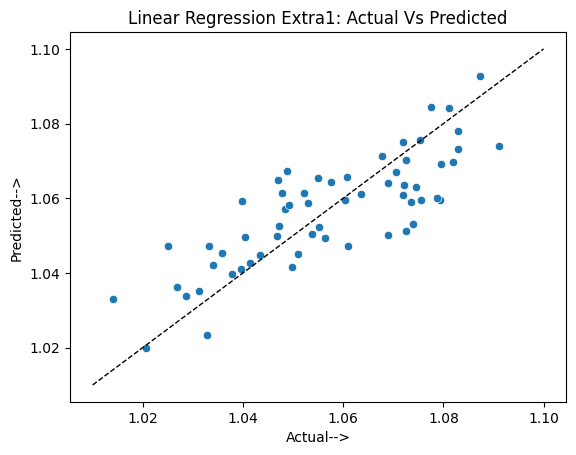

In [53]:
y_extra1_pred = linear.predict(X_extra1_test_transformed)
sns.scatterplot(x=y_extra1_test,y=y_extra1_pred)
plt.plot([1.01, 1.10], [1.01, 1.10], color = 'black',linestyle='--',linewidth=1)
plt.xlabel("Actual-->")
plt.ylabel("Predicted-->")
plt.title("Linear Regression Extra1: Actual Vs Predicted")

Text(0.5, 1.0, 'Extra1 Body Fat Percentage Linear Regression: Actual Vs Predicted')

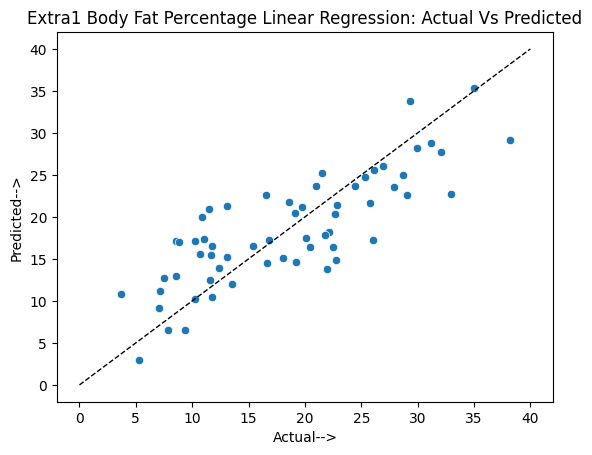

In [54]:
# Calculate bpdy fat percentage with Siri equation
perc_extra1_test = 495/y_extra1_test - 450
perc_extra1_pred = 495/y_extra1_pred - 450

# Plot as above
sns.scatterplot(x=perc_extra1_test,y=perc_extra1_pred)
plt.plot([0, 40], [0, 40], color = 'black',linestyle='--',linewidth=1)
plt.xlabel("Actual-->")
plt.ylabel("Predicted-->")
plt.title("Extra1 Body Fat Percentage Linear Regression: Actual Vs Predicted")

In [55]:
# Calculate the metrics for body percentage
r2=r2_score(perc_extra1_test,perc_extra1_pred)
rmse=root_mean_squared_error(perc_extra1_test,perc_extra1_pred)
mae=mean_absolute_error(perc_extra1_test,perc_extra1_pred)

print("R2_score: ", r2)
print("RMSE: ", rmse)
print("MAE: ", mae)

R2_score:  0.6588984786572178
RMSE:  4.864811045079193
MAE:  4.010150366436241


## 4.6. Select and save the best model
Now we want to save the best model (Linear Regression) to be used for predicting the Body Density from the user input and calculating the Fat Percentage with Siri equation.

In [56]:
# Train the Linear Regression model again with separate name to avoid later confusion
linear_extra1 = LinearRegression()
linear_extra1.fit(X_extra1_train_transformed,y_extra1_train)

# Confirm the metrics
y_extra1_pred = linear_extra1.predict(X_extra1_test_transformed)
r2=r2_score(y_extra1_test,y_extra1_pred)
rmse=root_mean_squared_error(y_extra1_test,y_extra1_pred)
mae=mean_absolute_error(y_extra1_test,y_extra1_pred)

print("R2_score: ", r2)
print("RMSE: ", rmse)
print("MAE: ", mae)

R2_score:  0.6563693149973355
RMSE:  0.010969609200236917
MAE:  0.009049669035284287


The scores are as above, we can save the model.

In [57]:
# save the model1
joblib.dump(linear_extra1, 'body_density_extra1.joblib')

['body_density_extra1.joblib']

# 5. Model basic
Now let's see if we can also build the most limited model, that takes into account only age and BMI, originating from height and weight input.
Model basic will **skip**, compared to model extra1, the following variables:
- ACratio, which is the ratio of Abdomen to Chest.

We start from the model extra1 data: X_extra1 and y_extra1

In [57]:
X_extra1.head()

,Age,BMI,ACratio
0,23,23.7,0.915145
1,22,23.2,0.886752
2,22,24.8,0.917537
3,26,24.8,0.848723
4,24,25.5,1.027749


## 5.1. Drop data that will not be used
Drop the ACratio that comes from Abdomen and Chest input

In [58]:
# drop the ACratio and define new data
X_basic = X_extra1.drop(['ACratio'],axis=1)
y_basic = y_extra1
X_basic.head()

,Age,BMI
0,23,23.7
1,22,23.2
2,22,24.8
3,26,24.8
4,24,25.5


## 5.2. Train-test split is the same

In [59]:
X_basic_train,X_basic_test,y_basic_train,y_basic_test = train_test_split(X_basic,y_basic,random_state=42)

## 5.3. Apply Power Transformation

In [60]:
trans_basic = PowerTransformer()
X_basic_train_transformed = pd.DataFrame(trans_basic.fit_transform(X_basic_train), columns=X_basic_train.columns)
X_basic_test_transformed = pd.DataFrame(trans_basic.transform(X_basic_test), columns=X_basic_test.columns)

## 5.4. Save the power transformer

In [62]:
# Save this transformer for use with `basic`
joblib.dump(trans_basic, 'trans_basic.joblib')

['trans_basic.joblib']

## 5.5. Test Machine Learning Models and check the metrics

In [61]:
# Build models and their metrics
hashmap_basic={}
def compute(model):
    model.fit(X_basic_train_transformed,y_basic_train)
    y_basic_pred = model.predict(X_basic_test_transformed)
    r2=r2_score(y_basic_test,y_basic_pred)
    rmse=root_mean_squared_error(y_basic_test,y_basic_pred)
    mae=mean_absolute_error(y_basic_test,y_basic_pred)
    hashmap_basic[str(model)]=(r2,rmse,mae)

In [62]:
for i in clf:
    compute(i)

In [63]:
# Show the scores of models

score_basic=pd.DataFrame(hashmap_basic)
score_basic = score_basic.transpose()
score_basic.columns=['R2_score','RMSE','MAE']
score_basic = score_basic.sort_values('R2_score',ascending=False)

In [66]:
score_basic

,R2_score,RMSE,MAE
LinearRegression(),0.564498,0.012349,0.009993
Ridge(),0.563550,0.012363,0.010001
BayesianRidge(),0.562530,0.012377,0.010009
GradientBoostingRegressor(),0.391658,0.014596,0.012247
RandomForestRegressor(),0.388042,0.014639,0.011871
SGDRegressor(),0.178721,0.016959,0.013993
ElasticNet(),-0.006107,0.018770,0.016047
Lasso(),-0.006107,0.018770,0.016047
SVR(),-0.016909,0.018871,0.016073
KernelRidge(),-3178.922116,1.055245,1.055173


The metrics went significantly down. Again, Linear Regression model is best, but with much lower scores. It will be used with a note of the low accuracy.

Text(0.5, 1.0, 'Linear Regression Basic: Actual Vs Predicted')

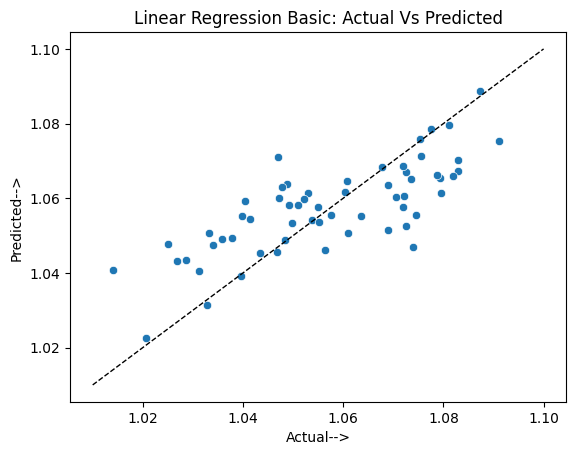

In [64]:
y_basic_pred = linear.predict(X_basic_test_transformed)
sns.scatterplot(x=y_basic_test,y=y_basic_pred)
plt.plot([1.01, 1.10], [1.01, 1.10], color = 'black',linestyle='--',linewidth=1)
plt.xlabel("Actual-->")
plt.ylabel("Predicted-->")
plt.title("Linear Regression Basic: Actual Vs Predicted")

This model also show very high bias.

Text(0.5, 1.0, 'Basic Body Fat Percentage Linear Regression: Actual Vs Predicted')

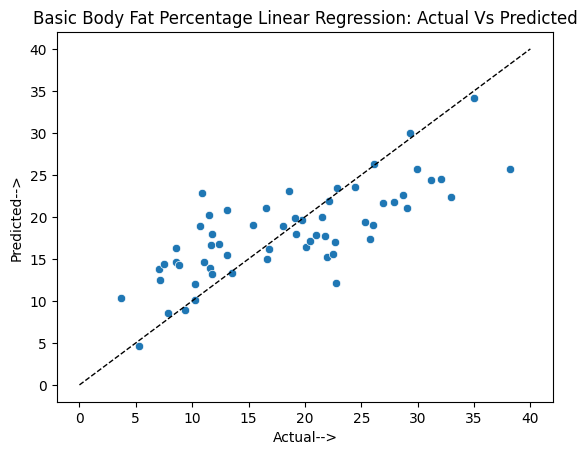

In [65]:
# Calculate bpdy fat percentage with Siri equation
perc_basic_test = 495/y_basic_test - 450
perc_basic_pred = 495/y_basic_pred - 450

# Plot as above
sns.scatterplot(x=perc_basic_test,y=perc_basic_pred)
plt.plot([0, 40], [0, 40], color = 'black',linestyle='--',linewidth=1)
plt.xlabel("Actual-->")
plt.ylabel("Predicted-->")
plt.title("Basic Body Fat Percentage Linear Regression: Actual Vs Predicted")

In [66]:
# Calculate the metrics for body percentage
r2=r2_score(perc_basic_test,perc_basic_pred)
rmse=root_mean_squared_error(perc_basic_test,perc_basic_pred)
mae=mean_absolute_error(perc_basic_test,perc_basic_pred)

print("R2_score: ", r2)
print("RMSE: ", rmse)
print("MAE: ", mae)

R2_score:  0.5639473453586192
RMSE:  5.500391669059844
MAE:  4.438158614202539


## 5.6. Select and save the best model
Now we want to save the best model (Linear Regression) to be used for predicting the Body Density from the user input and calculating the Fat Percentage with Siri equation.

In [68]:
# Train the Linear Regression model again with separate name to avoid later confusion
linear_basic = LinearRegression()
linear_basic.fit(X_basic_train_transformed,y_basic_train)

# Confirm the metrics
y_basic_pred = linear_basic.predict(X_basic_test_transformed)
r2=r2_score(y_basic_test,y_basic_pred)
rmse=root_mean_squared_error(y_basic_test,y_basic_pred)
mae=mean_absolute_error(y_basic_test,y_basic_pred)

print("R2_score: ", r2)
print("RMSE: ", rmse)
print("MAE: ", mae)

R2_score:  0.5644984415528944
RMSE:  0.012349234673192221
MAE:  0.009992622255881222


The scores are as above, we can save the model.

In [69]:
# save the model
joblib.dump(linear_basic, 'body_density_basic.joblib')

['body_density_basic.joblib']

# 10. Manual testing of several values
This is to compare specific values with the ones that are later used in Flask, to see if the models are working the same there.

In [70]:
# Load pre-trained models
model_basic = joblib.load('body_density_basic.joblib')
model_extra1 = joblib.load('body_density_extra1.joblib')
model_extra2 = joblib.load('body_density_extra2.joblib')
model_extra3 = joblib.load('body_density_extra3.joblib')

In [71]:
# Define test input values
# age, BMI
test_basic = [
    [23, 23.7],
    [22, 23.2],
    [22, 24.8],
    [26, 24.8],
    [24, 25.5]
]
# age, BMI, ACratio
test_extra1 = [
    [23, 23.7, 0.915145],
    [22, 23.2, 0.886752],
    [22, 24.8, 0.917537],
    [26, 24.8, 0.848723],
    [24, 25.5, 1.027749]
]
# age, BMI, ACratio, HTratio
test_extra2 = [
    [23, 23.7, 0.915145, 1.601695],
    [22, 23.2, 0.886752, 1.681431],
    [22, 24.8, 0.917537, 1.664430],
    [26, 24.8, 0.848723, 1.683860],
    [24, 25.5, 1.027749, 1.612342]
]
# age, Neck, Knee, Ankle, Biceps, Forearm, Wrist, BMI, ACratio, HTratio
test_extra3 = [
    [23, 36.2, 37.3, 21.9, 32.0, 27.4, 17.1, 23.7, 0.915145, 1.601695],
    [22, 38.5, 37.3, 23.4, 30.5, 28.9, 18.2, 23.2, 0.886752, 1.681431],
    [22, 34.0, 38.9, 24.0, 28.8, 25.2, 16.6, 24.8, 0.917537, 1.664430],
    [26, 37.4, 37.3, 22.8, 32.4, 29.4, 18.2, 24.8, 0.848723, 1.683860],
    [24, 34.4, 42.2, 24.0, 32.2, 27.7, 17.7, 25.5, 1.027749, 1.612342]
]

In [72]:
# Convert to DataFrame with the same feature names used in training
test_basic_df = pd.DataFrame(test_basic, columns=['Age', 'BMI'])
test_extra1_df = pd.DataFrame(test_extra1, columns=['Age', 'BMI', 'ACratio'])
test_extra2_df = pd.DataFrame(test_extra2, columns=['Age', 'BMI', 'ACratio', 'HTratio'])
test_extra3_df = pd.DataFrame(test_extra3, columns=['Age', 'Neck', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist', 'BMI', 'ACratio', 'HTratio'])

In [73]:
# Load pre-trained power transformers
transf_basic = joblib.load('trans_basic.joblib')
transf_extra1 = joblib.load('trans_extra1.joblib')
transf_extra2 = joblib.load('trans_extra2.joblib')
transf_extra3 = joblib.load('trans_extra3.joblib')

In [74]:
# Use the same power transformer as for the test data
test_basic_df_transformed = pd.DataFrame(transf_basic.transform(test_basic_df), columns=test_basic_df.columns)
test_extra1_df_transformed = pd.DataFrame(transf_extra1.transform(test_extra1_df), columns=test_extra1_df.columns)
test_extra2_df_transformed = pd.DataFrame(transf_extra2.transform(test_extra2_df), columns=test_extra2_df.columns)
test_extra3_df_transformed = pd.DataFrame(transf_extra3.transform(test_extra3_df), columns=test_extra3_df.columns)

Display predictions and check if they're within the expected range

In [75]:
# Get predictions from the saved models
saved_body_densities_basic = model_basic.predict(test_basic_df_transformed)
saved_body_densities_extra1 = model_extra1.predict(test_extra1_df_transformed)
saved_body_densities_extra2 = model_extra2.predict(test_extra2_df_transformed)
saved_body_densities_extra3 = model_extra3.predict(test_extra3_df_transformed)

Model basic

In [76]:
for i, prediction in enumerate(saved_body_densities_basic):
    print(f"Test Input {i + 1} - Predicted Body Density: {prediction}")
    if 1.02 <= prediction <= 1.10:
        print(f"Prediction {prediction} is within the expected range.")
    else:
        print(f"Warning: Prediction {prediction} is outside the expected range.")

Test Input 1 - Predicted Body Density: 1.0684314587260086
Prediction 1.0684314587260086 is within the expected range.
Test Input 2 - Predicted Body Density: 1.070913643875104
Prediction 1.070913643875104 is within the expected range.
Test Input 3 - Predicted Body Density: 1.0644466130083061
Prediction 1.0644466130083061 is within the expected range.
Test Input 4 - Predicted Body Density: 1.0629114542243663
Prediction 1.0629114542243663 is within the expected range.
Test Input 5 - Predicted Body Density: 1.0610310317966776
Prediction 1.0610310317966776 is within the expected range.


Model extra1

In [77]:
for i, prediction in enumerate(saved_body_densities_extra1):
    print(f"Test Input {i + 1} - Predicted Body Density: {prediction}")
    if 1.02 <= prediction <= 1.10:
        print(f"Prediction {prediction} is within the expected range.")
    else:
        print(f"Warning: Prediction {prediction} is outside the expected range.")

Test Input 1 - Predicted Body Density: 1.065134498526945
Prediction 1.065134498526945 is within the expected range.
Test Input 2 - Predicted Body Density: 1.0713691526964508
Prediction 1.0713691526964508 is within the expected range.
Test Input 3 - Predicted Body Density: 1.0618770744710424
Prediction 1.0618770744710424 is within the expected range.
Test Input 4 - Predicted Body Density: 1.0712500627021888
Prediction 1.0712500627021888 is within the expected range.
Test Input 5 - Predicted Body Density: 1.0405639780774278
Prediction 1.0405639780774278 is within the expected range.


Model extra2

In [78]:
for i, prediction in enumerate(saved_body_densities_extra2):
    print(f"Test Input {i + 1} - Predicted Body Density: {prediction}")
    if 1.02 <= prediction <= 1.10:
        print(f"Prediction {prediction} is within the expected range.")
    else:
        print(f"Warning: Prediction {prediction} is outside the expected range.")

Test Input 1 - Predicted Body Density: 1.065259918108154
Prediction 1.065259918108154 is within the expected range.
Test Input 2 - Predicted Body Density: 1.0712457525771872
Prediction 1.0712457525771872 is within the expected range.
Test Input 3 - Predicted Body Density: 1.0617646563213576
Prediction 1.0617646563213576 is within the expected range.
Test Input 4 - Predicted Body Density: 1.0711198778281472
Prediction 1.0711198778281472 is within the expected range.
Test Input 5 - Predicted Body Density: 1.0406047520138104
Prediction 1.0406047520138104 is within the expected range.


Model extra3

In [79]:
for i, prediction in enumerate(saved_body_densities_extra3):
    print(f"Test Input {i + 1} - Predicted Body Density: {prediction}")
    if 1.02 <= prediction <= 1.10:
        print(f"Prediction {prediction} is within the expected range.")
    else:
        print(f"Warning: Prediction {prediction} is outside the expected range.")

Test Input 1 - Predicted Body Density: 1.061870377455282
Prediction 1.061870377455282 is within the expected range.
Test Input 2 - Predicted Body Density: 1.0756309586679929
Prediction 1.0756309586679929 is within the expected range.
Test Input 3 - Predicted Body Density: 1.0566645526565965
Prediction 1.0566645526565965 is within the expected range.
Test Input 4 - Predicted Body Density: 1.0719171175004887
Prediction 1.0719171175004887 is within the expected range.
Test Input 5 - Predicted Body Density: 1.0402713181124592
Prediction 1.0402713181124592 is within the expected range.
